In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
data = pd.read_excel(r'/Users/zhan/Downloads/data_matstat_K5.xls',sheet_name='A - aaup')
print(data)

         A1                            A2  A3   A4   A5   A6   A7   A8 A9  \
0      1061     Alaska Pacific University  AK  IIB  454  382  362  382  N   
1      1063         Univ.Alaska-Fairbanks  AK    I  686  560  432  508  Y   
2      1065         Univ.Alaska-Southeast  AK  IIA  533  494  329  415  N   
3     11462         Univ.Alaska-Anchorage  AK  IIA  612  507  414  498  Y   
4      1002     Alabama Agri.&Mech. Univ.  AL  IIA  442  369  310  350  N   
...     ...                           ...  ..  ...  ...  ...  ...  ... ..   
1068   3825  West Virginia Inst. of Tech.  WV  IIB  408  340  297  349  N   
1069   3827      West Virginia University  WV    I  535  431  361  439  Y   
1070   3830  West Virginia Wesleyan Coll.  WV  IIB  441  383  339  383  N   
1071   3831       Wheeling Jesuit College  WV  IIB  403  348  282  315  N   
1072   3932         University of Wyoming  WY    I  539  410  374  445  Y   

      A10  A11  A12  A13 A14  A15  A16  A17  A18  A19 A20  
0     567  485 

# 1. Описательные статистики
## 1.1 выборочные характеристики


In [356]:
print("Выборка 1:")
print("Выборочные хар-ки:")
print("Объем выборки:", len(data['A5']))
print("среднеее:", np.mean(data['A5']))
print("дисперсия:", np.var(data['A5']))
print("c.к.o:", np.std(data['A5']))
print("коэффициент ассиметрии:", sts.skew(data['A5']))
print("Эксцесс:", sts.kurtosis(data['A5']))

print("Выборка 2:")
print("Выборочные хар-ки:")
print("Объем выборки:", len(data['A6']))
print("среднеее:", np.mean(data['A6']))
print("дисперсия:", np.var(data['A6']))
print("c.к.o:", np.std(data['A6']))
print("коэффициент ассиметрии:", sts.skew(data['A6']))
print("Эксцесс:", sts.kurtosis(data['A6']))

print("Выборка 3:")
print("Выборочные хар-ки:")
print("Объем выборки:", len(data['A7']))
print("среднеее:", np.mean(data['A7']))
print("дисперсия:", np.var(data['A7']))
print("c.к.o:", np.std(data['A7']))
print("коэффициент ассиметрии:", sts.skew(data['A7']))
print("Эксцесс:", sts.kurtosis(data['A7']))


Выборка 1:
Выборочные хар-ки:
Объем выборки: 1073
среднеее: 526.4836905871389
дисперсия: 13855.93100147744
c.к.o: 117.71121867297713
коэффициент ассиметрии: 0.6786486256734204
Эксцесс: 0.5304432832288937
Выборка 2:
Выборочные хар-ки:
Объем выборки: 1073
среднеее: 420.04193849021436
дисперсия: 4953.143627929115
c.к.o: 70.37857364233176
коэффициент ассиметрии: 0.3481481718850067
Эксцесс: 0.17581685259992685
Выборка 3:
Выборочные хар-ки:
Объем выборки: 1073
среднеее: 355.08853681267476
дисперсия: 2901.5830279615984
c.к.o: 53.86634411171412
коэффициент ассиметрии: 0.44737126211025235
Эксцесс: 0.4319131904766307


## 1.2. Группировка и гистограммы частот 

In [357]:
n=int(np.log2(data['A5'].count()))+1
n

11

[ 28. 118. 227. 277. 171. 123.  80.  31.   7.   7.   4.]
[0.02609506 0.1360671  0.34762349 0.60577819 0.76514445 0.87977633
 0.95433364 0.9832246  0.98974837 0.99627213 1.        ]


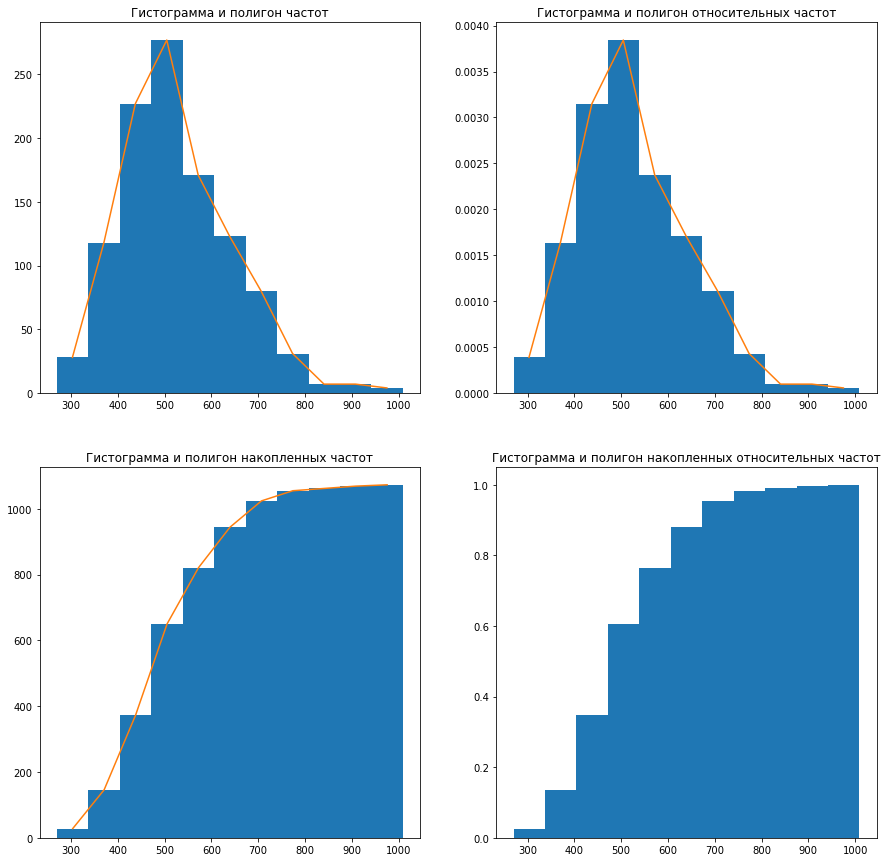

In [358]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))

ax[0][0].set_title('Гистограмма и полигон частот')
a = ax[0][0].hist(data['A5'],bins = 11)
b=[a[1][i]+(a[1][1]-a[1][0])//2 for i in range(len(a[1])-1)]
ax[0][0].plot(b,a[0])

print(a[0])

a_r=[]
temp = [a[0]/len(data['A5']) for i in range(len(data['A5']))]
a_r.append(temp)
sum0 =0


ax[0][1].set_title("Гистограмма и полигон относительных частот")
a = ax[0][1].hist(data['A5'],bins = 11,density=True)
ax[0][1].plot(b,a[0])
for i in range(len(a[0])):
    sum0 += a[0][i]*(a[1][2]-a[1][1])

ax[1][0].set_title('Гистограмма и полигон накопленных частот')
a = ax[1][0].hist(data['A5'],bins = 11, cumulative = True)
b = []
for i in range(len(a[1])-1):
    b.append((a[1][i+1] + a[1][i])/2)
ax[1][0].plot(b, a[0])


ax[1][1].set_title('Гистограмма и полигон накопленных относительных частот')
a = ax[1][1].hist(data['A5'],bins = 11,density=True,cumulative = True)
print(a[0])

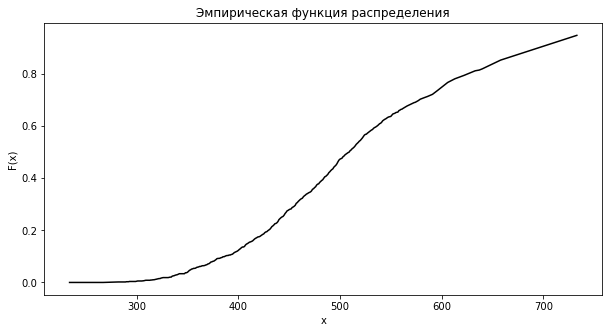

In [359]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data['A5'])
ecdf(data['A5'])
plt.figure(figsize=(10,5))
plt.plot(sorted(data['A6']),sorted(ecdf(data['A6'])), color = 'black')
plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

# 2. Интервальные оценки 
## 2.1 Доверительные интервалы для мат. ожидания


    

In [360]:
def confidence_interval_alpha_for_m(alpha,sample):
    low = np.mean(sample) - (np.std(sample) * sts.t.ppf(1-alpha/2, len(sample)-1))/(np.power(len(sample), 1/2))
    up = np.mean(sample) + (np.std(sample) * sts.t.ppf(1-alpha/2, len(sample)-1))/(np.power(len(sample), 1/2))
    print('Границы для alpha = ', alpha,"|", low,up)
confidence_interval_alpha_for_m(0.01,data['A5'])
confidence_interval_alpha_for_m(0.05,data['A5'])
confidence_interval_alpha_for_m(0.1,data['A5'])

Границы для alpha =  0.01 | 517.210931956055 535.7564492182228
Границы для alpha =  0.05 | 519.4325933620347 533.534787812243
Границы для alpha =  0.1 | 520.5677920280283 532.3995891462495


## 2.2 Доверительные интервалы для дисперсии


In [361]:
def confidence_interval_alpha_for_v(alpha,sample):
    low = (len(sample) - 1) * np.std(sample) ** 2 / (sts.chi2.ppf(1-alpha/2, len(sample)-1))
    up = (len(sample) - 1) * np.std(sample) ** 2 / (sts.chi2.ppf(alpha/2, len(sample)-1))
    print('Границы для alpha = ', alpha,"|", low,up)
confidence_interval_alpha_for_v(0.01,data['A5'])
confidence_interval_alpha_for_v(0.05,data['A5'])
confidence_interval_alpha_for_v(0.1,data['A5'])
    

Границы для alpha =  0.01 | 12429.515101882767 15529.25829918511
Границы для alpha =  0.05 | 12753.862863359467 15108.037705681452
Границы для alpha =  0.1 | 12924.204425248558 14898.377819881156


## 2.3 Доверительные интервалы для разности мат. ожиданий

In [362]:
def confidence_interval_alpha_for_minus_m(alpha,X1,X2):
    X1_mean = np.mean(X1)
    X2_mean = np.mean(X2)
    X1_var = np.var(X1)
    X2_var = np.var(X2)
    low = (X1_mean-X2_mean) - sts.t.ppf(1-alpha/2, np.power(X1_var/len(X1)+X2_var/len(X1),1/2))
    up = (X1_mean-X2_mean) + sts.t.ppf(1-alpha/2, np.power(X1_var/len(X1)+X2_var/len(X2),1/2))
    print('Границы для alpha = ', alpha,"|", low,up)
confidence_interval_alpha_for_minus_m(0.01,data['A5'],data['A6'])
confidence_interval_alpha_for_minus_m(0.05,data['A5'],data['A6'])
confidence_interval_alpha_for_minus_m(0.1,data['A5'],data['A6'])

    

Границы для alpha =  0.01 | 101.97496317838757 110.90854101546147
Границы для alpha =  0.05 | 103.7134889177869 109.17001527606213
Границы для alpha =  0.1 | 104.33694470535245 108.54655948849658


## 2.4 . Доверительные интервалы для отношения дисперсий

In [363]:
def confidence_interval_alpha_for_division_of_variance(alpha,X1,X2):
    X1_var = np.var(X1)
    X2_var = np.var(X2)
    low = X1_var/X2_var * sts.f.ppf(alpha, len(X1) - 1, len(X2) - 1)
    up = X1_var/X2_var * sts.f.ppf(1 - alpha, len(X1) - 1, len(X2) - 1)
    print('Границы для alpha = ', alpha,"|", low,up)
    
confidence_interval_alpha_for_division_of_variance(0.01,data['A5'],data['A6'])
confidence_interval_alpha_for_division_of_variance(0.05,data['A5'],data['A6'])
confidence_interval_alpha_for_division_of_variance(0.1,data['A5'],data['A6'])

Границы для alpha =  0.01 | 2.426606173024132 3.224855674021309
Границы для alpha =  0.05 | 2.5298775854381392 3.0932147589808165
Границы для alpha =  0.1 | 2.586690970578233 3.0252762215127267


# 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

 ## 3.1 Проверка статистических гипотез о математических ожиданиях

In [364]:
def z_test(m0,X1):
    Z = (X1.mean()-m0)*np.sqrt(len(X1))/X1.std()
    return Z

In [365]:
print("Выборочные значения:")
print("1:", z_test(526,data["A5"]))
print("2:", z_test(530,data["A5"]))
print("3:", z_test(515,data["A5"]))

Выборочные значения:
1: 0.13453868315356268
2: -0.978062527048884
3: 3.1941920112102906


In [366]:
print("p-values:")
print("1:",2*min(sts.t.cdf(z_test(526,data['A5']), len(data['A5'])), 
                 1-sts.t.cdf(z_test(526,data['A5']), len(data['A5']))))
print("2:",2*min(sts.t.cdf(z_test(530,data['A5']), len(data['A5'])), 
                 1-sts.t.cdf(z_test(530,data['A5']), len(data['A5']))))
print("3:",2*min(sts.t.cdf(z_test(515,data['A5']), len(data['A5'])), 
                 1-sts.t.cdf(z_test(515,data['A5']), len(data['A5']))))

p-values:
1: 0.8930018555090604
2: 0.32826385822529325
3: 0.0014430650663754818


## 3.2 Проверка статистических гипотез о дисперсиях

In [367]:
def chi_squared_test(sigma,sample):
    sum0 = 0
    for i in sample:
        sum0 += (i-sample.mean()) ** 2
    s0 = sum0/(len(sample)-1)
    return (len(sample)-1)*s0/(sigma ** 2)

In [368]:
print("Выборочные значения:")
print("1:", chi_squared_test(118,data["A5"]))
print("2:", chi_squared_test(125,data["A5"]))
print("3:", chi_squared_test(110,data["A5"]))
print("p-values:")
print("1:",2*min(sts.chi2.cdf(chi_squared_test(118,data['A5']), len(data['A5'])-1), 
                 1-sts.chi2.cdf(chi_squared_test(118,data['A5']), len(data['A5'])-1)))
print("2:",2*min(sts.chi2.cdf(chi_squared_test(125,data['A5']), len(data['A5'])-1), 
                 1-sts.chi2.cdf(chi_squared_test(125,data['A5']), len(data['A5'])-1)))
print("3:",2*min(sts.chi2.cdf(chi_squared_test(110,data['A5']), len(data['A5'])-1), 
                 1-sts.chi2.cdf(chi_squared_test(110,data['A5']), len(data['A5'])-1)))

Выборочные значения:
1: 1067.7545220184784
2: 951.5144937334587
3: 1228.711897899611
p-values:
1: 0.9383001947254296
2: 0.007103008416079608
3: 0.0011681385131800948


## 3.3 Проверка статистических гипотез о равенстве математических ожиданий

In [369]:
def two_sample_z_test(sample1,sample2):
    den = np.var(sample1)/len(sample1)+np.var(sample2)/len(sample2)
    z = (sample1.mean()-sample2.mean())/np.power(den,1/2)
    k = (np.power((np.var(sample1)/len(sample1))+(np.var(sample2)/len(sample2)), 2))/((((np.var(sample1)/len(sample1))**2)/(len(sample1)-1)) + 
                                                                                      (((np.var(sample2)/len(sample2))**2)/(len(sample2)-1)))
    p_value = 2*min(1 - sts.t.cdf(z, k), sts.t.cdf(z, k))
    return z, p_value
print("Выборочные значения:")
print("1:", two_sample_z_test(data["A5"],data["A6"]))




Выборочные значения:
1: (25.423079812176585, 0.0)


## 3.4 Проверка статистических гипотез о равенстве дисперсий

In [370]:
def two_sample_F_test(sample1,sample2):
    sum01 = 0
    sum02 = 0
    for i in sample1:
        sum01 += np.power((i-np.mean(sample1)), 2)
    for i in sample2:
        sum02 += np.power((i-np.mean(sample2)), 2)   
    s1 = sum01/(len(sample1)-1)
    s2 = sum02/(len(sample2)-1)
    return s1/s2

print("Статистика критерия:", two_sample_F_test(data['A5'],data['A6']))
print("p_value =", 1-sts.f.cdf(two_sample_F_test(data['A5'],data['A6']), len(data['A5'])-1, len(data['A6'])-1))


Статистика критерия: 2.797401416617215
p_value = 1.1102230246251565e-16


# 4. Критерии согласия

## 4.1. Критерий хи-квадрат 

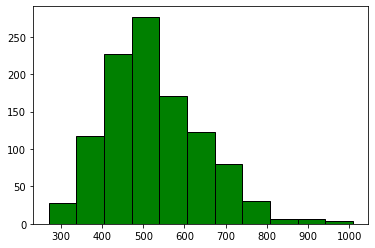

In [371]:
a =plt.hist(data['A5'],bins=11,color='green',edgecolor='black')[0:2]


In [372]:
a1=[i/1073 for i in a[0]]
a1

[0.0260950605778192,
 0.10997204100652376,
 0.21155638397017706,
 0.2581547064305685,
 0.15936626281453867,
 0.11463187325256291,
 0.07455731593662628,
 0.028890959925442685,
 0.0065237651444548,
 0.0065237651444548,
 0.003727865796831314]

In [373]:
a1=[i/len(data['A5']) for i in a[0]]
s2=[]
for i in range(11):
    x=len(data['A5'])*(sts.norm.cdf(a[1][i+1],loc=data['A5'].mean(),scale=data['A5'].std())-
                       sts.norm.cdf(a[1][i],loc=data['A5'].mean(),scale=data['A5'].std()))
    s2.append(x)
s2_o=[i/len(data) for i in s2]
s2_o

[0.03927255398967249,
 0.09589564065426721,
 0.17055311446086974,
 0.2209737633853857,
 0.20858056734916597,
 0.1434339391989502,
 0.07185040929797248,
 0.02621342139341687,
 0.006963388854792751,
 0.0013464117402749443,
 0.00018942250972731056]

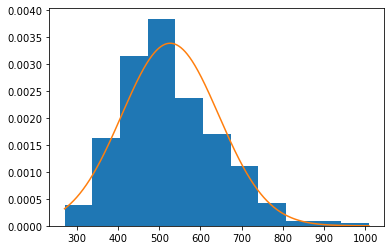

In [374]:
plt.hist(data['A5'],bins=11,density=True);
x=np.linspace(min(data['A5']),max(data['A5']),1000)
plt.plot(x,sts.norm.pdf(x,loc=data['A5'].mean(),scale=data['A5'].std()))

In [375]:
sts.chisquare(a[0],s2)

Power_divergenceResult(statistic=135.63536889080552, pvalue=3.2984016705883796e-24)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

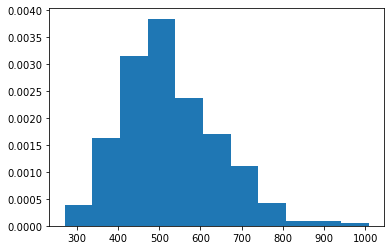

In [376]:
plt.hist(data['A5'],bins=11,density=True)
x=np.linspace(min(data['A5']),max(data['A5'],1000))
plt.plot(x,sts.norm.pdf(x,loc=data["A5"].mean(),scale=data['A5'].std()))

## 4.2 Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса (критерий Харке-Бера

In [377]:
def jarque_bera(sample):
    k = sts.kurtosis(sample)
    s = sts.skew(sample)
    return len(sample)/6*(k**2+s**2/4)
jarque_bera(data['A5'])
p_value = 1- sts.chi2.cdf(jarque_bera(data['A5']), 2)
print(jarque_bera(data['A5']))
print('p-value =',p_value)

70.9093956371835
p-value = 4.440892098500626e-16


# 5. Проверка однородности выборок

## 5.1 Критерий знаков 

In [378]:
def sign_test(sample1,sample2):
    quantity_p = 0
    len_n = len(sample1)
    for i in range (len(sample1)):
        if ((sample1[i] - sample2[i]) > 0):
            quantity_p += 1
        if ((sample1[i] - sample2[i]) == 0):
            len_n -= 1
    freq = quantity_p/len_n
    z_value = 2 * np.sqrt(len_n) * (freq - 1/2)
    p_value = 2 * min(sts.norm.cdf(z_value, 0, 1), 1 - sts.norm.cdf(z_value, 0, 1))
    return z_value, p_value
sign_test(data['A5'],data['A6'])

(32.3903412017948, 0.0)

## 5.2 Критерий Хи-квадрат


In [ ]:
a=plt.hist(data['A5'],bins=11,color = 'green',edgecolor = 'black')
a


In [ ]:
b=[]
k=0
for j in data['A6']:
    if j < a[1][1]:
        k+=1
b.append(k)
for i in range(1,len(a[1])-2):
    k=0
    for j in data['A6']:
        if a[1][i] < j < a[1][i+1]:
            k+=1
    b.append(k)
k=0
for j in data['A6']:
    if a[1][9] < j:
        k+=1
b.append(k)

    
b

In [ ]:
a0=[i/1073 for i in a[0]]
a0

In [ ]:
b0=[i/1073 for i in b]
b0

In [ ]:
sts.chisquare(a[0],b)

In [ ]:
fig, ax = plt.subplots()

ax.hist(data['A5'], 11,alpha=0.5,label='A5',density=True)
ax.hist(data['A6'],11,alpha=0.5,label='A6',density=True)
ax.legend()

plt.show()

# 6. Таблицы сопряженности

In [ ]:
len(data['A4'])

In [389]:
a=pd.crosstab(data['A4'],data['A9'])
a

A9,N,Y
A4,,
I,13,167
IIA,177,182
IIB,411,123


In [390]:
sts.chi2_contingency(a.values)

(275.62600669302554,
 1.4079042246124842e-60,
 2,
 array([[100.82013048,  79.17986952],
        [201.08014911, 157.91985089],
        [299.09972041, 234.90027959]]))

# 7 Дисперсионный анализ

In [ ]:
print(data[data.A4=="IIB"].A5.count())
print(data[data.A4=="IIB"].A5.mean())
print(data[data.A4=="IIB"].A5.var())

print(data[data.A4=="I"].A5.count())
print(data[data.A4=="I"].A5.mean())
print(data[data.A4=="I"].A5.var())

print(data[data.A4=="IIA"].A5.count())
print(data[data.A4=="IIA"].A5.mean())
print(data[data.A4=="IIA"].A5.var())

In [ ]:
X1=data[data.A4=="IIB"].A5
X2=data[data.A4=="I"].A5
X3=data[data.A4=="IIA"].A5


In [ ]:
D_vnutr=(X1.var(ddof=0)*len(X1)+X2.var(ddof=0)*len(X2)+X3.var(ddof=0)*len(X3))/(len(X1)+len(X2)+len(X3))
D_vnutr

In [ ]:
D_mezh=len(X1)*(X1.mean()-data.A5.mean())**2+len(X2)*(X2.mean()-data.A5.mean())**2+len(X3)*(X3.mean()-data.A5.mean())**2
D_mezh /= len(X1)+len(X2)+len(X3)
D_mezh

In [ ]:
D_vnutr+D_mezh

In [ ]:
D_x=data.A5.var(ddof=0)
D_x

In [ ]:
nu_2= D_mezh/D_x
print(nu_2)
nu=(D_mezh/D_x)**0.5
print(nu)

In [ ]:
sts.f_oneway(X1,X2,X3)

# 8. Корреляционный анализ

## 8.1 Расчёт парных коэффициентов корреляции

In [ ]:
sts.pearsonr(data.A5,data.A6)

In [ ]:
sts.spearmanr(data.A5,data.A6)

In [ ]:
sts.kendalltau(data.A5,data.A6)

In [ ]:
def dov_interval_for_coef_pearson(alpha, vib1, vib2):
    correl, _ = sts.pearsonr(vib1, vib2)
    lower_bound = correl + (correl*(1-correl**2))/(2*len(vib1)) - sts.norm.ppf(1-alpha/2, loc=0, scale=1)*(1-correl**2)/np.power(len(vib1), 1/2)
    upper_bound = correl + (correl*(1-correl**2))/(2*len(vib1)) + sts.norm.ppf(1-alpha/2, loc=0, scale=1)*(1-correl**2)/np.power(len(vib1), 1/2)
    return lower_bound, upper_bound

In [ ]:
print(dov_interval_for_coef_pearson(0.01, data['A5'], data['A6']))
print(dov_interval_for_coef_pearson(0.05, data['A5'], data['A6']))
print(dov_interval_for_coef_pearson(0.1, data['A5'], data['A6']))

In [ ]:
def pearson(x, y):
    ro_pearson, _ = sts.pearsonr(x, y)
    z_crit = (ro_pearson * np.power(len(x) - 2, 1/2))/(np.power(1 - np.power(ro_pearson, 2), 1/2)) 
    p_value = 2*min(sts.t.cdf(z_crit, len(x) - 2), 1 - sts.t.cdf(z_crit, len(x) - 2))
    return ro_pearson, z_crit, p_value

def spirmen(x, y):
    ro_spirmen, _ = sts.spearmanr(x, y) 
    z_crit = (ro_spirmen * np.power(len(x) - 2, 1/2))/(np.power(1 - np.power(ro_spirmen, 2), 1/2)) 
    p_value = 2*min(sts.t.cdf(z_crit, len(x) - 2), 1 - sts.t.cdf(z_crit, len(x) - 2))
    return ro_spirmen, z_crit, p_value

def kendell(x, y):
    tao_kendell, _ = sts.kendalltau(x,y)
    z_crit =  np.power((9 * len(x) * (len(x) - 1))/(2 * (2 * len(x) + 5)), 1/2) * tao_kendell
    p_value = 2*min(sts.norm.cdf(z_crit, 0, 1), 1 - sts.norm.cdf(z_crit, 0, 1))
    return tao_kendell, z_crit, p_value

In [ ]:
print(pearson(data['A5'], data['A6']))
print(spirmen(data['A5'], data['A6']))
print(kendell(data['A5'], data['A6']))

## 8.2 . Расчёт множественных коэффициентов корреляции

In [ ]:
corr_k=data[["A5","A6","A7"]].corr(method='kendall')
corr_k

In [ ]:
print(sts.kendalltau(data.A5,data.A6))
print(sts.kendalltau(data.A5,data.A7))
print(sts.kendalltau(data.A6,data.A7))

In [ ]:
def kendall_w(expt_ratings):
    if expt_ratings.ndim != 2:
        raise 'ratings matrix must be 2-dimensional'
    k = expt_ratings.shape[0] #raters
    n = expt_ratings.shape[1] # items rated
    denom = k ** 2 * (n ** 3 - n)
    rating_sums = np.sum(expt_ratings, axis=0)
    S = n * np.var(rating_sums)
    return 12 * S / denom

w = kendall_w(corr_k)
w

In [ ]:
stat_w = 1073 * (3) * w
stat_w

In [ ]:
pvalue_w = 1 - sts.chi2.cdf(stat_w, df=n-1)
pvalue_w

# 9. Регрессионный анализ

## 9.1 Простейшая регрессионная модель

In [ ]:
X = data['A15']
Y = data['A10']
ro_pearson, _ = sts.pearsonr(X,Y)
beta_0 = np.mean(Y) - ro_pearson * (np.std(Y)/np.std(X)) * np.mean(X)
beta_1 = ro_pearson * (np.std(Y)/np.std(X))
print(beta_0)
print(beta_1)

In [ ]:
regr_func = beta_0 + beta_1 * X

k = 2

D_regr = 0
for i in range(len(X)):
    D_regr += (regr_func[i] - np.mean(Y))**2 
D_regr = D_regr/len(X)

D_res = 0
for i in range(len(X)):
    D_res += (Y[i] - regr_func[i])**2
D_res = D_res/len(X)

D_Y = 0
for i in range(len(X)):
    D_Y += (Y[i] - np.mean(Y))**2
D_Y = D_Y/len(X)

In [ ]:
print(D_regr)
print(D_res)
print(D_Y)
len(data['A15'])

In [ ]:
plt.scatter(X,Y)
plt.plot(X1,regr_func)

In [ ]:
k = 2
print(D_regr*len(X)/(k-1))
print(D_res*len(X)/(len(X)-k))
print(D_Y*len(X)/(len(X)-1))


In [ ]:
coef_det = D_regr/D_Y
correl_ratio = np.power(coef_det, 1/2)
print(coef_det)
print(correl_ratio)

In [ ]:
def dov_interval_beta_0(alpha, X, Y):
    ro_pearson, _ = sts.pearsonr(X,Y)
    beta_0 = np.mean(Y) - ro_pearson * (np.std(Y)/np.std(X)) * np.mean(X)
    D_res = 0
    for i in range(len(X)):
        D_res += (Y[i] - regr_func[i])**2
    D_res = D_res/len(X)
    x = 0
    for i in range(len(X)):
        x += X[i]**2
    low = beta_0 - sts.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(x/((len(X)**2)*np.var(X)), 1/2)
    up = beta_0 + sts.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(x/((len(X)**2)*np.var(X)), 1/2)
    return low, up

print(dov_interval_beta_0(0.01, X, Y))
print(dov_interval_beta_0(0.05, X, Y))
print(dov_interval_beta_0(0.1, X, Y))


In [ ]:
def dov_interval_beta_1(alpha, X, Y):
    ro_pearson, _ = sts.pearsonr(X,Y)
    beta_1 = ro_pearson * (np.std(Y)/np.std(X))
    D_res = 0
    for i in range(len(X)):
        D_res += (Y[i] - regr_func[i])**2
    D_res = D_res/len(X)
    low = beta_1 - sts.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(1/((len(X))*np.var(X)), 1/2)
    up = beta_1 + sts.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(1/((len(X))*np.var(X)), 1/2)
    return low, up

print(dov_interval_beta_1(0.01, X, Y))
print(dov_interval_beta_1(0.05, X, Y))
print(dov_interval_beta_1(0.1, X, Y))

In [ ]:
x_linspace = np.linspace(min(X),max(X), len(X))
regr_func = beta_0 + beta_1 * x_linspace
fig, ax = plt.subplots()
ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x_linspace, regr_func, lw=3, color='r', alpha=1)
lower_bound = regr_func - sts.t.ppf(1-0.1/2, len(X)-2) * np.power(D_res, 1/2) * np.power((1/len(X))+((x_linspace-np.mean(X))**2)/(len(X)*np.var(X)), 1/2)
ax.plot(x_linspace, lower_bound, lw=1, color='r',linestyle= "--",alpha=1)
upper_bound = regr_func + sts.t.ppf(1-0.1/2, len(X)-2) * np.power(D_res, 1/2) * np.power((1/len(X))+((x_linspace-np.mean(X))**2)/(len(X)*np.var(X)), 1/2)
ax.plot(x_linspace, upper_bound, lw=1, color='r',linestyle= "--",`z alpha=1)
plt.scatter(X, Y)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sorted(X), Y - regr_func, lw=1, alpha=1)
ax.set_title('e(x)')
ax.set_xlabel('x')
ax.set_ylabel('e')

In [ ]:
def significance_of_linear_regression_model(regr_func, X, Y):
    D_regr = 0
    for i in range(len(X)):
        D_regr += (regr_func[i] - np.mean(Y))**2 
    D_regr = D_regr/len(X)
    D_Y = 0
    for i in range(len(X)):
        D_Y += (Y[i] - np.mean(Y))**2
    D_Y = D_Y/len(X)
    coef_det = D_regr/D_Y
    criterion = coef_det/(1 - coef_det)*(len(X) - 2)
    p_value =  1 - sts.f.cdf(criterion, 1, len(X) - 2)
    return criterion, p_value
significance_of_linear_regression_model(regr_func,X,Y)


In [ ]:
X = data['A15']
Y = data['A10']

In [ ]:
import numpy as np
a0 = np.ones((len(X), 1))
a1 = np.expand_dims(X ,axis=0)
a2 = np.expand_dims(X**2 ,axis=0)
A = np.concatenate((a0, a1.T, a2.T), axis=1)
Y1 = np.expand_dims(Y, axis=0).T
beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y1)
beta
b0 = beta[0, 0]
b1 = beta[1, 0]
b2 = beta[2, 0]
b0 , b1, b2

print ("b0:",b0," | b1:",b1," | b2:",b2)
reg_func = lambda x: b0 + b1*x + b2*x**2

In [ ]:
regr_func = b0 + b1*X + b2*(X**2)
k = 3

D_regr = 0
for i in range(len(X)):
    D_regr += (regr_func[i] - np.mean(Y))**2 
D_regr = D_regr/len(X)

D_res = 0
for i in range(len(X)):
    D_res += (Y[i] - regr_func[i])**2
D_res = D_res/len(X)

D_Y = 0
for i in range(len(X)):
    D_Y += (Y[i] - np.mean(Y))**2
D_Y = D_Y/len(X)


In [ ]:
coef_det = D_regr/D_Y
correl_ratio = np.power(coef_det, 1/2)
print(coef_det)
print(correl_ratio)

In [ ]:

print(D_regr)
print(D_res)
print(D_Y)

print(D_regr*len(X)/(k-1))
print(D_res*len(X)/(len(X)-k))
print(D_Y*len(X)/(len(X)-1))

In [ ]:
x_linspace = np.linspace(min(X),max(X), len(X))


In [ ]:
 regr_func = b0 + b1*x_linspace + b2 *(x_linspace**2)

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x_linspace, regr_func, lw=3, color='r', alpha=1)
plt.scatter(X, Y)

TypeError: <lambda>() missing 1 required positional argument: 'x2'

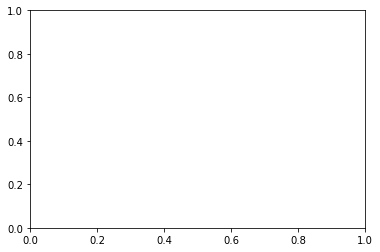

In [379]:
f0 = lambda x : 1
f1 = lambda x : x
f2 = lambda x : x**2

f_row = lambda x : np.array([f0(x), f1(x), f2(x)]) 
f_column = lambda x : (f_row(x)).transpose()  

F = [
    f_row(val) for val in x
]

F = np.array(F)

fig, ax = plt.subplots()

x_linspace = np.linspace(min(X), max(X), 100)
y_values = [
    reg_func(a) for a in x_linspace
]
y_values_min = [
    reg_func(a)-sts.t(n-k).ppf(1-0.1/2)*np.sqrt(D_res)*np.sqrt(np.dot(np.dot(f_row(a),np.linalg.inv(np.dot(F.transpose(),F))),f_column(a))) for a in x_linspace
]
y_values_max = [
    reg_func(a)+sts.t(n-k).ppf(1-0.1/2)*np.sqrt(D_res)*np.sqrt(np.dot(np.dot(f_row(a),np.linalg.inv(np.dot(F.transpose(),F))),f_column(a))) for a in x_linspace
]


ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X, Y)
ax.plot(x_linspace, y_values, color='r', lw=3, label='f(x)')
ax.plot(x_linspace, y_values_min, color='r',linestyle = '--',lw=1, label='f_min(x)')
ax.plot(x_linspace, y_values_max, color='r', linestyle ='--',lw=1, label='f_max(x)')


In [ ]:
fig, ax = plt.subplots()
ax.plot(sorted(X), Y - regr_func, lw=1, alpha=1)
ax.set_title('e(x)')
ax.set_xlabel('x')
ax.set_ylabel('e')

In [ ]:
def significance_of_linear_regression_model_2(regr_func, X, Y):
    D_regr = 0
    for i in range(len(X)):
        D_regr += (regr_func[i] - np.mean(Y))**2 
    D_regr = D_regr/len(X)
    D_Y = 0
    for i in range(len(X)):
        D_Y += (Y[i] - np.mean(Y))**2
    D_Y = D_Y/len(X)
    coef_det = D_regr/D_Y
    criterion = (coef_det/(3-1))/((1 - coef_det)/(len(X) - 3))
    p_value = 1 - sts.f.cdf(criterion, 3 - 1, len(X) - 3)
    return criterion, p_value

In [ ]:
significance_of_linear_regression_model_2(regr_func, X, Y)

In [380]:
X1 = np.array(data['A16']) 
X2 = np.array(data['A5']) 
Y = np.array(data['A10'])

In [381]:
f0 = lambda x1, x2 : 1
f1 = lambda x1, x2 : x1
f2 = lambda x1, x2 : x2

y_column =  np.array(Y).transpose()

F = [
    np.array([f0(X[i], X2[i]), f1(X1[i], X2[i]), f2(X1[i], X2[i])]) for i in range(len(Y))
]

F = np.array(F)

b = np.dot(np.dot(np.linalg.inv(np.dot(F.transpose(), F)), F.transpose()), y_column)

b0 = b[0]
b1 = b[1]
b2 = b[2]


print ("b0:",b0," | b1:",b1," | b2:",b2)


reg_func = lambda x1, x2: b0 + b1*x1 + b2*x2

b0: -17.439760832919188  | b1: -0.04575523781379731  | b2: 1.2869234274631083


In [382]:
regr_func = b0 + b1 *X1 + b2 *X2
k = 3

D_regr = 0
for i in range(len(X)):
    D_regr += (regr_func[i] - np.mean(Y))**2 
D_regr = D_regr/len(X)

D_res = 0
for i in range(len(X)):
    D_res += (Y[i] - regr_func[i])**2
D_res = D_res/len(X)

D_Y = 0
for i in range(len(X)):
    D_Y += (Y[i] - np.mean(Y))**2
D_Y = D_Y/len(X)

In [383]:
print(D_regr)
print(D_res)
print(D_Y)
print(D_regr*len(X)/(k-1))
print(D_res*len(X)/(len(X)-k))
print(D_Y*len(X)/(len(X)-1))

22279.75252018397
477.4138188903051
22757.166339074232
11953087.2270787
478.75236230775454
22778.3950390174


In [384]:

coef_det = D_regr/D_Y
correl_ratio = np.power(coef_det, 1/2)
print(coef_det)
print(correl_ratio)

0.9790213855373312
0.989455095260685


In [385]:
x_linspace = np.linspace(min(X1),max(X1), len(X1))
y_linspace = np.linspace(min(X2),max(X2),len(X2))

In [386]:
 regr_func = b0 + b1*x_linspace + b2 *y_linspace

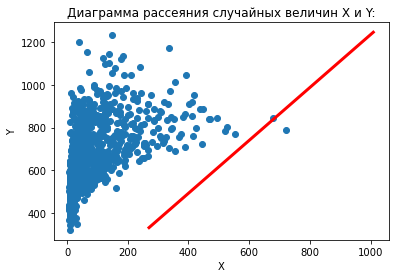

In [388]:
fig, ax = plt.subplots()
ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(y_linspace, regr_func, lw=3, color='r', alpha=1)
plt.scatter(X1, Y)